# Imports 

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define device for torch
use_cuda = True
print("CUDA is available:", torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA is available: True


# Load Dataset
WELFake from HuggingFace

In [3]:
from datasets import load_dataset

dataset = load_dataset("lelexuanzz/WELFake_stylo_feats")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['label', 'has_quotes', 'has_url', 'percent_uppercase', 'frequency_punctuation', 'percent_whitespace', 'frequency_words_length_15', 'frequency_words_length_14', 'frequency_words_length_12', 'frequency_words_length_11', 'avg_sentence_length'],
        num_rows: 72134
    })
})


## Split dataset

In [4]:
#convert dataset to pandas for easier implementation with sklearn

df = dataset["train"].to_pandas()
print(df)

       label  has_quotes  has_url  percent_uppercase  frequency_punctuation  \
0          1           0        1           3.188750                    182   
1          1           0        0           4.347826                      1   
2          1           0        0           2.314815                      2   
3          0           0        1           3.071161                    154   
4          1           0        1           6.419624                     42   
...      ...         ...      ...                ...                    ...   
72129      0           0        1           3.801170                    105   
72130      1           0        1           3.302146                     51   
72131      0           1        0           3.666201                     85   
72132      0           0        1           3.704801                     73   
72133      1           0        0           3.945428                     62   

       percent_whitespace  frequency_words_length_1

In [5]:
from sklearn.model_selection import train_test_split

seed = 45

y = df["label"]
x = df.drop(labels=["label"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

print(x_train, y_train)

       has_quotes  has_url  percent_uppercase  frequency_punctuation  \
22156           1        1           4.200000                     78   
46603           0        1          10.169492                     11   
22381           0        1           5.925030                     32   
13489           0        1           4.518848                     86   
40644           0        1           2.686404                     30   
...           ...      ...                ...                    ...   
12895           0        1           3.796928                     38   
60960           0        1           6.216216                     12   
6012            0        1           3.363914                     40   
63107           0        1           3.407657                     45   
6558            0        0           5.263158                      8   

       percent_whitespace  frequency_words_length_15  \
22156           15.500000                          0   
46603            0.0000

### Iteration 1

no further preprocessing

In [6]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [7]:
#instantiate with default params first
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = rf.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8311499272197962


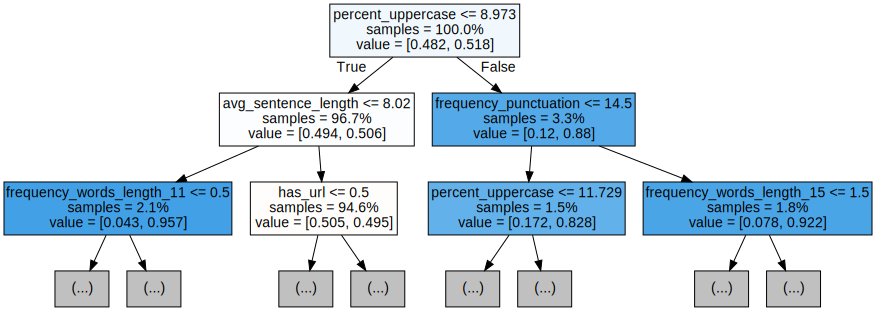

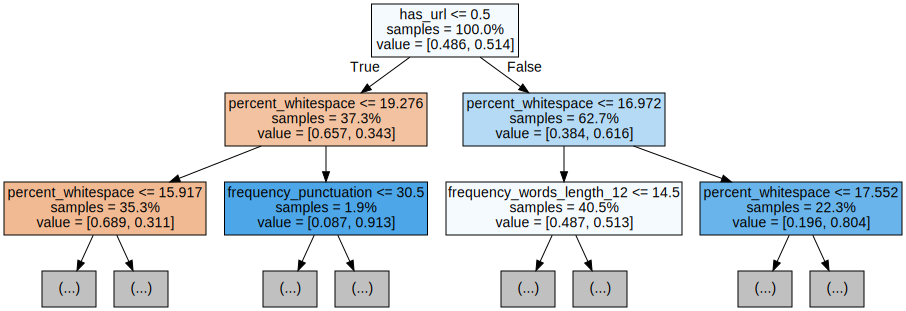

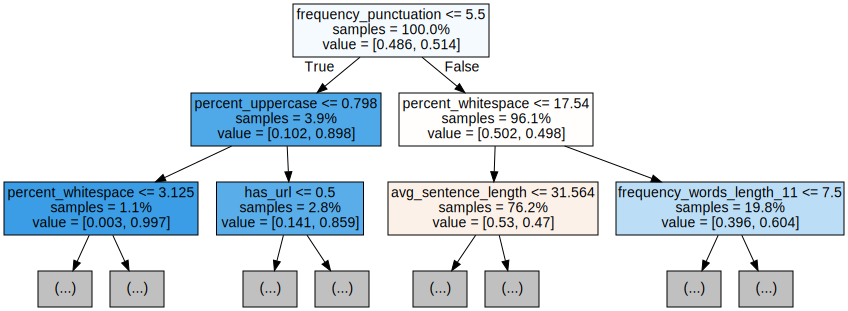

In [11]:
from sklearn.tree import export_graphviz
import graphviz

# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)